In [30]:
import pandas as pd
control_set_data = pd.read_csv('../../data/0002-getting-control-sets/control_set_data_complete.csv', index_col = False)

In [31]:
from collections import Counter
field_length_sequence = control_set_data.sequence.astype(str).map(len) 

In [32]:
print('The column with sequence with the maximum length:', field_length_sequence.idxmax(), 'with length:', field_length_sequence.loc[field_length_sequence.idxmax()])
print('The column with sequence with the minimum length:', field_length_sequence.idxmin(), 'with length:', field_length_sequence.loc[field_length_sequence.idxmin()])

The column with sequence with the maximum length: 1257 with length: 7919
The column with sequence with the minimum length: 1288 with length: 11


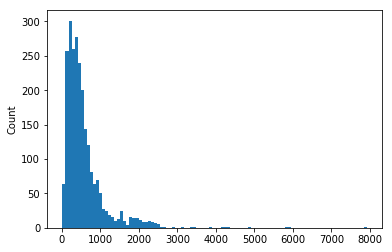

In [33]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.clf()
plt.hist(field_length_sequence, bins = 100)
plt.ylabel('Count')
plt.show()

In [35]:
print(len(control_set_data.loc[control_set_data.sequence.astype(str).map(len) > 2500]))

14


In [37]:
control_data_set = control_set_data.loc[control_set_data.sequence.astype(str).map(len) <= 2500]
print(control_data_set)

          protein_id                                           sequence  \
0             P52751  MFSLKTVVLALAAAAFVQAIPAPGEGPSVSMAQQKCGAEKVVSCCN...   
1             P49606  MLFTMQFTTRSTVASPEQQHQHQQRSISYSDIELGLERISSRDSNG...   
2             O13337  MLASSRQPRHAFVEHHHQLSSSTLHRSGSPQTGTLRQDATTPTLAT...   
3             Q01143  MPSLGFLKKKRTRDGNNDNSSQPASPVTPTAAQSFEQAQVLGAPSA...   
4             Q99129  MSHDGAMFSQHSVLSPPLLAAIDSQHTFGSYDATGTSNLPQRASVD...   
5             Q01168  MNPTITEHDFRFPRRPAAPGRDPGSDSSDDPLPASLRELNSDRQSA...   
6             Q92246  MSRANPPSNSSGSRKISFNVSEQYDIQDVVGEGAYGVVCSAIHKPS...   
7             Q99101  MRDPGCADAIATRSGPRNQIMVDLLRGWSTEAESGSSSSTALSGLD...   
8             Q00298  MKTSAQQLLSALLLPLSVLAAPTGSIEARACSDVTVIFARGTTETG...   
9             Q00364  MHFVTSLIAGVAMLATASATVQGGAPVDDLKFAKKFNQNCQQISGG...   
10            Q00365  MLFNAAAAAVFAPLLVMGNVLPRNAGNSPGSNRCDASTFNNGQDFD...   
11            P87032  MGCGASKVDKEGQARNDAIDAQLKKDRLAQKNEIKMLLLGAGESGK...   
12            P87033  MGA

In [38]:
control_data_set_without_id = control_data_set[['sequence', 'category', 'label']]

In [47]:
# separate each column 

input_control_data = control_data_set_without_id['sequence'].tolist()
label_control_data = control_data_set_without_id['label'].tolist()
category_control_data = control_data_set_without_id['category'].tolist()

In [40]:
Counter(category_data)

Counter({'fungi': 989, 'oomycetes': 125, 'bacteria': 1233, 'Others': 28})

In [42]:
def find_char_uniq(my_list):
  long_list = [''.join(my_list)]  
  for key, element in enumerate(long_list):
    return(set(element)) 

In [46]:
# find all possible letters of amino acids 
len(find_char_uniq(input_data))

21

In [48]:
def get_key(mydict, element):
    key = list(mydict.keys())[list(mydict.values()).index(element)]
    return(key)

amino = ['R', 'K', 'D', 'E', 'Q', 'N', 'H', 'S', 'T', 'Y', 'C', 'W', 'A', 'I', 'L', 'M', 'F', 'V', 'P', 'G']
token_index = dict(zip(range(1, (len(amino)+1)), amino))

def get_encoding(mydata, max_length):
    results = np.zeros((len(mydata), max_length, max(token_index.keys())))
    for i, sample in enumerate(mydata):
        for j, character in enumerate(sample):
            if character in token_index.values():
                index = get_key(token_index, character) - 1
                results[i, j, index] = 1. 
            else:
                results[i, j, :] = results[i, j, :]
    return results

In [49]:
encoded_input_control_data = get_encoding(input_control_data, 2500)

In [50]:
print(encoded_input_control_data.shape)

(2375, 2500, 20)


In [54]:
# save the control data sets
import numpy as np

np.save('../../data/0002-getting-control-sets/x_control.npy', encoded_input_control_data)
np.save('../../data/0002-getting-control-sets/y_control.npy', label_control_data)
np.save('../../data/0002-getting-control-sets/category_control.npy', category_control_data)